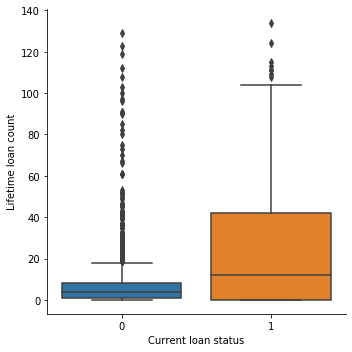

In [2]:
### Load dependencies and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

data_folder = Path("../data/raw")
file_to_open = data_folder / 'biblioMTL_cat_2020_01_09.csv'
df = pd.read_csv(file_to_open,usecols=[3,4,5], nrows = 1000)

### Convert statut-document type to category to save on memory
df['Statut-document']=df['Statut-document'].astype('category')

### Categories of statut that constitute a used document
Used = ['Consultation sur place','En traitment','En transit','Facturé','Prêt retrait','Prêté','Recherché']

### Create numeric vector from 'Statut-document'
numeric_statut = []
for Statut in df['Statut-document']:
    if Statut == "Disponible":
        numeric_statut.append(0)
    elif Statut in Used:
        numeric_statut.append(1)
    else:
        numeric_statut.append(2)

### Create lists: x=lifetime borrows, y=numeric_statut for records with 0 or 1
x = []
y = []
for i in range(len(numeric_statut)):
    if numeric_statut[i] == 0 or numeric_statut[i] == 1:
        y.append(numeric_statut[i])
        x.append(df['Nombre-prets-vie'][i])

### Make new dataframe from x and y, and plot
reduced_data = pd.DataFrame({'Lifetime loan count':x,'Current loan status':y})
ax = sns.catplot(y='Lifetime loan count',x='Current loan status',kind = 'box',data=reduced_data)
ax.savefig('./figures/loan_status_boxplots.png')
